### ガボールフィルタ

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Gabor
def gabor_filter(K_size=111, sigma=10, gamma=1.2, Lambda=10,  psi=0, angle=0):
    #get half size
    d = K_size//2
    
    # prepare kernel
    gabor = np.zeros((K_size, K_size), dtype=np.float32)
    
    # each value
    for y in range(K_size):
        for x in range(K_size):
            # distance from center
            px = x - d
            py = y - d
            
            # degree -> radian
            theta = angle/180.*np.pi
            
            # get kernel x
            _x = np.cos(theta)*px + np.sin(theta)*py
            # get kernel y
            _y = -np.sin(theta)*px + np.cos(theta)*py
            
            # fill kernel
            gabor[y,x] = np.exp(-(_x**2+gamma**2*_y**2) / (2*sigma**2)) * np.cos(2*np.pi*_x/Lambda + psi)
            
            
    # kernel normalization
    gabor /= np.sum(np.abs(gabor))
    
    return gabor


            

True

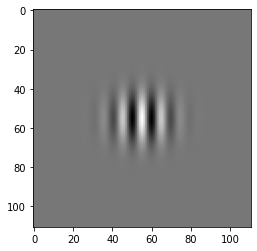

In [4]:
# get gabor kernel
gabor = gabor_filter(K_size=111, sigma=10, gamma=1.2, Lambda=10, psi=0, angle=0)

# visualize
# normalize to [0,255]
out = gabor - np.min(gabor)
out = out/out.max() * 255
out = out.astype(np.uint8)

plt.imshow(out, cmap='gray')
cv2.imwrite('out77.jpg', out)


True

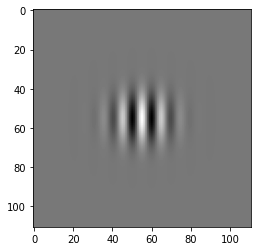

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gabor
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
	# get half size
	d = K_size // 2

	# prepare kernel
	gabor = np.zeros((K_size, K_size), dtype=np.float32)

	# each value
	for y in range(K_size):
		for x in range(K_size):
			# distance from center
			px = x - d
			py = y - d

			# degree -> radian
			theta = angle / 180. * np.pi

			# get kernel x
			_x = np.cos(theta) * px + np.sin(theta) * py

			# get kernel y
			_y = -np.sin(theta) * px + np.cos(theta) * py

			# fill kernel
			gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

	# kernel normalization
	gabor /= np.sum(np.abs(gabor))

	return gabor


# get gabor kernel
gabor = Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0)

# Visualize
# normalize to [0, 255]
out = gabor - np.min(gabor)
out /= np.max(out)
out *= 255

plt.imshow(out, cmap='gray')
cv2.imwrite('out77.jpg', out)